# Проект "Приоритизация гипотез и запуск A/B-теста"

### <font color='green'>Описание проекта:</font>

Для повышение эффективности продаж в компании необходимо приоритезировать имеющиеся гипотезы, чтобы выбрать лучшую. Также нужно провести А/В тест для того, чтобы понять, имеются ли различия между покупателями из двух групп.

### <font color='green'>Цели и задачи:</font>

#### RICE и ICE
1) Применить фреймворк ICE для приоритизации гипотез\
2) Применить фреймворк RICE для приоритизации гипотез\
3) Обоснование изменения приоритизации гипотез при применении RICE вместо ICE\

#### A/B анализа
- Пострить график кумулятивной выручки по группам.\
- Пострить график кумулятивного среднего чека по группам.\
- Пострить график относительного изменения кумулятивного среднего чека группы B к группе A.\
- Пострить график кумулятивного среднего количества заказов на посетителя по группам.\
- Пострить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.\
- Пострить точечный график количества заказов по пользователям.\
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.\
- Пострить точечный график стоимостей заказов.\
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.\
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.\
- Посчитатье статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.\
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.\
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.\
- Принять решение по результатам теста и объяснить его.

### <font color='green'>Получение данных, просмотр и обработка:</font>

1) Выгрузка данных\
2) Приведение данных к нужному формату\
3) Проверка на дубликаты

### <font color='green'>Результаты исследования</font>

Основные выводы по проведенному исследованию

## Часть 1. Приоритизация гипотез.

### Выгрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

Выгружаем данные

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except: 
    data = pd.read_csv('/Users/temp/Desktop/projects/hypothesis.csv', sep=',')

Смотрим на данные

In [3]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Проверим форматы данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Все форматы верные, поэтому можно работать дальше

Приведем заголовки к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

### Применение фреймворка ICE для приоритизации гипотез

Ознакомимся с гипотезами, которые направлены увеличение выручки интернет-магазина 

In [6]:
display(list(data['hypothesis']))

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Вычисляем ICE для каждой гипотезы

In [7]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']

Выведем результат вычислений в порядке убывания гипотез по приоритету 

In [8]:
display(data[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Для увеличения выручки на основе вычисленного ICE в приоритете стоят следующие гипотезы: 
1) Запустить акцию, дающую скидку на товар в день рождения\
2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
Менее важными являются:
1) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию\
2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа\
И наименьшим приоритетом обладают:
1) Запустить собственную службу доставки, что сократит срок доставки заказов\
2) Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов\
3) Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар\
4) Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

### Вывод

Таким образом наиболее приоритетным по ICE является запуск акции в честь дня рождения - это связано с тем, что компания максимально уверена в его реализации и высоком влиянии на клиентов при средних затратах на выполнение данной задачи. Добавление двух новых каналов трафика обладает высоким влиянием на клиентов и компания тоже уверена в данной гипотезе, но затраты и усилия на её реализацию чуть выше среднего. Гипотеза о приоритетности формы подписки имеет чуть больше среднего показатели по влиянию и уверенности при средних затратах. Таким образом данные гипотезы оказываются в приоритете по показателям влияния, уверенности в реализации и эффекте на клиентов.\
Это связано с тем, что данные гипотезы ориентированы на привлечение клиентов через прямое взаимодействие с компанией. Ведь зачастую клиент может купить что-то, если имеется скидка в день рождения или есть большая вероятность привлечь клиентов с помощью новых каналов трафика.\
Гипотезы - находящиеся в середине, выступают неким промежуточным звеном, поскольку данные по ним средние и компании может быть безразлично их реализовывать, но дополнительный эффект на выручку компании они все же могут дать.\
Гипотезами-аутсайдерами выступают своя служба доставки, отзывы клиентов, изменение стуктуры категорий и изменения фона страницы. Прежде всего у всех гипотез низкие показатели влияния, уверенности или высокие затраты (например как у изменении структуры категорий).


### Применение фреймворка RICE для приоритизации гипотез

Вычисляем RICE

In [9]:
data['RICE'] = (data['impact']*data['confidence']*data['reach'])/data['efforts']

Выведем RICE в порядке убывания приоритетности гипотез

In [10]:
display(list(data['hypothesis']))

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

In [11]:
display(data[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее приоритетными по RICE являются: 
1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа\
Средним приоритетом обладают: 
1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
2) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию\
3) Запустить акцию, дающую скидку на товар в день рождения\
Наименее приоритетными гипотезами являются: 
1) Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар\
2) Запустить собственную службу доставки, что сократит срок доставки заказов\
3) Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов\
4) Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

### Вывод

Но добавление еще одного показателя - сколько клиентов данное мероприятие может затронуть, даёт более четкое представление о приоритетности гипотезы. В нашем случе гипотеза о том, чтобы добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, становится лидером. Ведь она не только имеет высокие показатель по ICE, но и охватывает большое число клиентов - а значит, есть больше шансов, что она даст свои плоды после реализации.\
А вот запуск новых каналов снизился в позиции за счёт не очень высокого охвата аудитории. А запуск акцию, дающую скидку на товар в день рождения снизился еще сильнее, поскольку данная акция охватывает небольшое количество людей (ведь день рождения всего раз в году!) и непонятно, какое число пользователей сможет воспользоваться данной опцией в скором времени.\
При этом нижнии позиции по приоритетности гипотез не изменились, это связано с тем, что влияние повышения охвата не сильно увеличило общий показатель, так как изначально ICE был на низком уровне.

Таким образом, важно отметить, что ICE и RICE могут отличаться друг от друга, поскольку второй показатель учитывает также охват аудитории, что является важным компонентом при желании повышения продаж. Чем больше охват - тем больше шанс, что компания найдет новых клиентов и продаст больше! При этом те гипотезы, которые уже получили низкий показатель по ICE, скорее всего, останутся на довольно низком уровне приоритетности для бизнеса.

## Часть 2. Анализ A/B-теста

In [12]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except: 
    orders = pd.read_csv('/Users/temp/Desktop/projects/orders.csv', sep=',')
    visitors = pd.read_csv('/Users/temp/Desktop/projects/visitors.csv', sep=',')

Смотрим на данные 

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders = orders.rename({'transactionId': 'transaction_id', 'visitorId': 'visitor_id', 'date':'date', 
                        'revenue':'revenue',
                        'group': 'group'}, axis='columns')

Рассмотрим временной промежуток в течение которого проводится a/b тест

In [16]:
display('Начало теста', visitors['date'].min())
display('Конец теста', visitors['date'].max())

'Начало теста'

'2019-08-01'

'Конец теста'

'2019-08-31'

1 августа 2019 года началось проведение а/б теста, а 31 августа 2019 тест был закончен. Длительность - месяц

Явные дубликаты

In [17]:
orders.duplicated().sum()

0

In [18]:
visitors.duplicated().sum()

0

Явных дубликатов нет

Нужно узнать, есть ли одинаковые пользователи в группе А и Б

In [19]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Такие посетители есть, возможно они были отнесены к разным группам случайно

In [20]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем дату к нужному формату

In [22]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [23]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Посмотрим, насколько равномерно распределены группы по количеству людей

In [24]:
orders.groupby(by='group').agg({'visitor_id':'nunique'})

,visitor_id
group,
A,503
B,586


Группы различаются незначительно

А если посмотрим количество человек в группах исходя из даты

In [50]:
visits = visitors.groupby(by=['date','group']).agg({'visitors':'sum'})

In [55]:
visits

visitors
date       group          
2019-08-01 A           719
           B           713
2019-08-02 A           619
           B           581
2019-08-03 A           507
...                    ...
2019-08-29 B           531
2019-08-30 A           490
           B           490
2019-08-31 A           699
           B           718

[62 rows x 1 columns]

Относительно равномерное колебание человек по группам и разница в количестве все также незначительная

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [58]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверка совпадения дат

In [59]:
print('Начало исследования', visitors['date'].min())
print('Таблица начало исследования', cumulativeData['date'].min())
print('Конец исследования', visitors['date'].max())
print('Таблица конец исследования', cumulativeData['date'].max())

Начало исследования 2019-08-01 00:00:00
Таблица начало исследования 2019-08-01 00:00:00
Конец исследования 2019-08-31 00:00:00
Таблица конец исследования 2019-08-31 00:00:00


Все окей - даты совпали, можно продолжать исследование

Построим график коммулятивной выручки

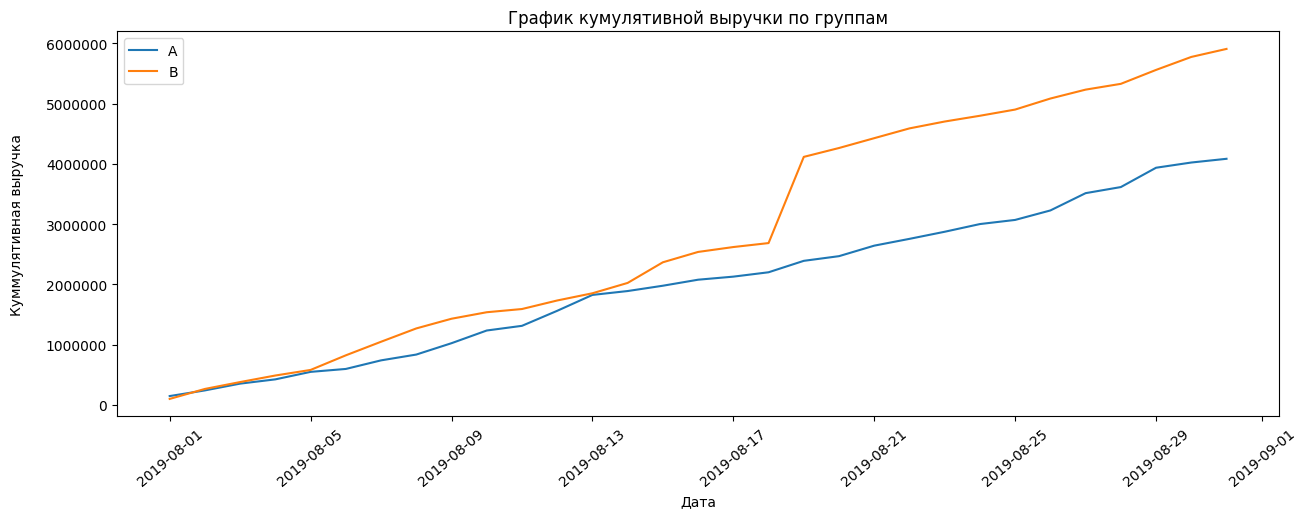

In [61]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.xticks(rotation = 40) 
plt.ticklabel_format(axis='y', style='plain')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Куммулятивная выручка\n')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

В первые дни измений по суммарной выручке между группами А и В не наблюдается, первые изменения появились после 5 августа, когда выручка по группе В начала расти быстрее. 13 августа группы вновь сравнялись, после чего группа В по выручке вырвалась вперед, сильно опередив группу А, которая продожила расти линейно и достаточно равномерно. Возможно, данный всплеск связан с наличием в группе В заказов, который были достаточно большими по сумме, что смогли так сильно изменить график кривой суммарной выручке по группе В.\
Такие крупные заказы - это скорее исключение, чем правило. И такие заказы могут дать надежду на то, что изменения для группы В дали лучшие результаты, хотя на дале это далеко не так. Поэтому для корректных выводов необходимо делать корректировку на них

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

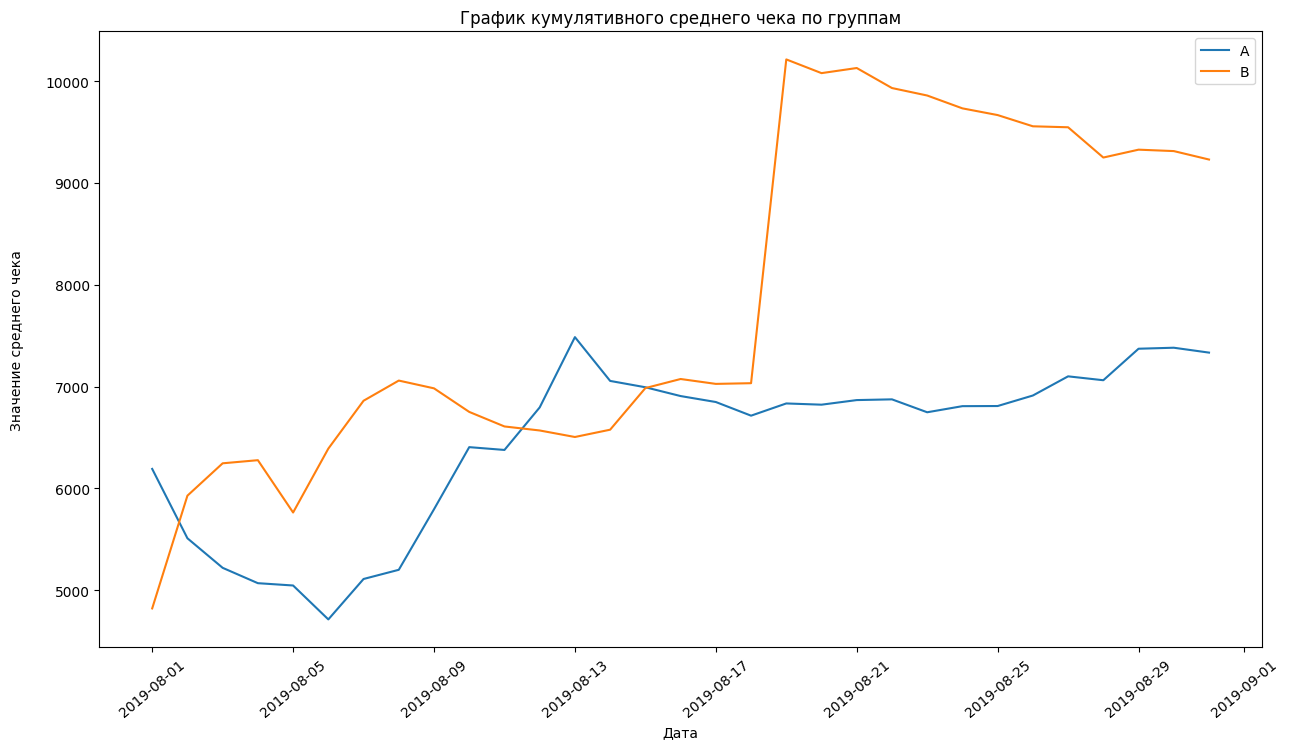

In [65]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 40) 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Значение среднего чека\n')
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() ;

Оказывается, что изначально в группе А более низкий средний чек, за исключением 10-15 августа. В начале эксперимента виден сильных разрыв по средним чекам. То есть покупатели в группе В в среднем за покупку изначально тратили больше, чем покупатели группы А. Но после 18 августа средний чек группы В резко подскачил - а это вероятнее всего признак, что были совершенные крупные заказы, которые могут быть аномальными заказами

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

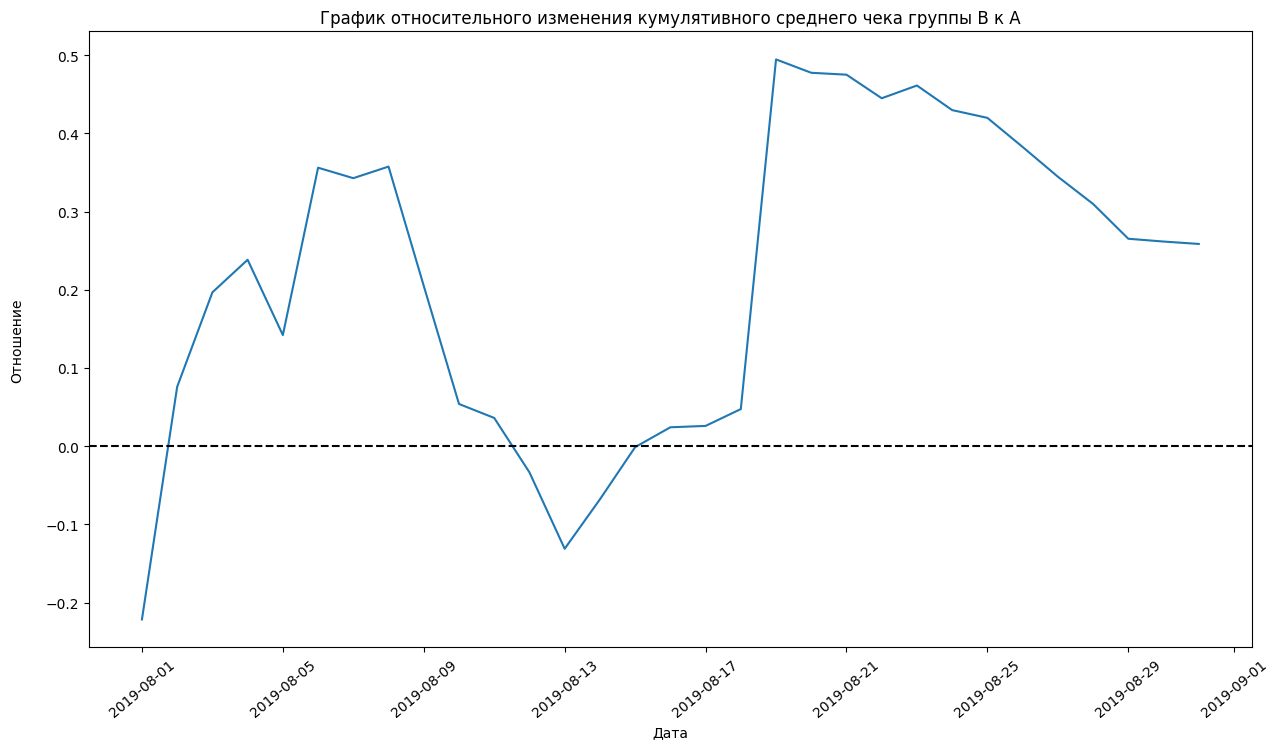

In [67]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,8))
plt.title('График относительного изменения кумулятивного среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Отношение\n')
plt.xticks(rotation = 40) 
plt.plot(cumulativeRevenueA['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') ;

На этом графике можно увидеть, что группа В лидирует по коммулятивному среднему чеку почти все время эксперимента за исключением нескольких дней в середине августа. Причем различия в средних чеках существенные как в первой половине месяца, так и во второй. Поэтому в целом группа В показывает лучшие результаты по среднему коммулятивному чеку

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

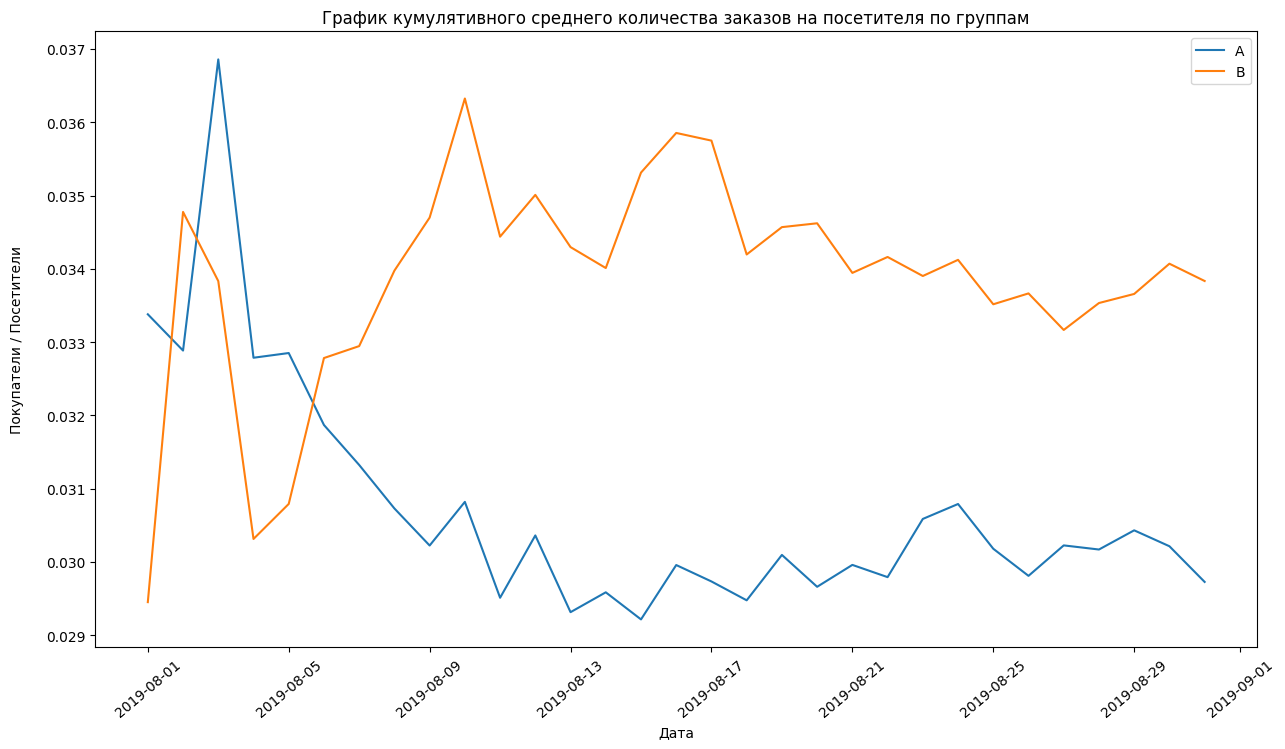

In [69]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_avg_visitors_A = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_avg_visitors_B = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]
plt.figure(figsize=(15,8))
plt.xticks(rotation = 40) 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Покупатели / Посетители\n')
# Строим график выручки группы А
plt.plot(cumulative_avg_visitors_A['date'],cumulative_avg_visitors_A['orders']/cumulative_avg_visitors_A['visitors'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_avg_visitors_B['date'],cumulative_avg_visitors_B['orders']/cumulative_avg_visitors_B['visitors'], label='B')

plt.legend() ;



При запуске эксперимента в группе А в среднем клиенты делали большее количество заказов, чем в группе В, хотя обе группы изначально росли. Потом после спада количество заказов в группе В после 5 августа начинается рост коммулятивного среднего количество заказов, в то время как в группе А наблюдается противоположная тенденция - количество заказов начинает снижаться. Поэтому разрыв между группами А и В составлял большу часть августа около 0.5%

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

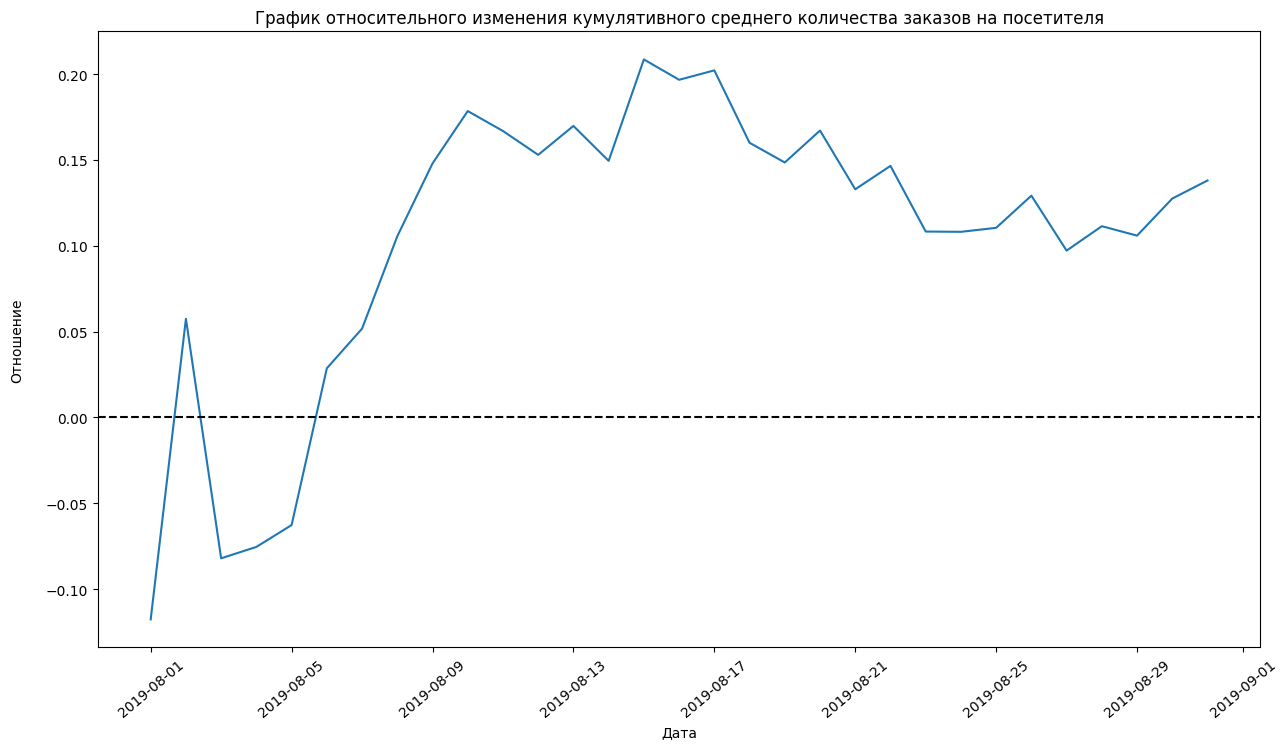

In [71]:
# собираем данные в одном датафрейме
mergedCumulative_avg_visitors = cumulative_avg_visitors_A.merge(cumulative_avg_visitors_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,8))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Отношение\n')
plt.xticks(rotation = 40)

# cтроим отношение средних чеков
plt.plot(mergedCumulative_avg_visitors['date'],(mergedCumulative_avg_visitors['ordersB']/mergedCumulative_avg_visitors['visitorsB'])/(mergedCumulative_avg_visitors['ordersA']/mergedCumulative_avg_visitors['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') ;

Большую часть августа лидером по количеству заказов на посетителя являлась группа В, чье среднее количество было стабильно больше на 10-20%, чем в группе А

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [78]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(15)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Клиенты у которых заказов больше 4-5 - сокорее исключение, чем правильно. Обычно пользователи совершают 2-3 заказа, не больше

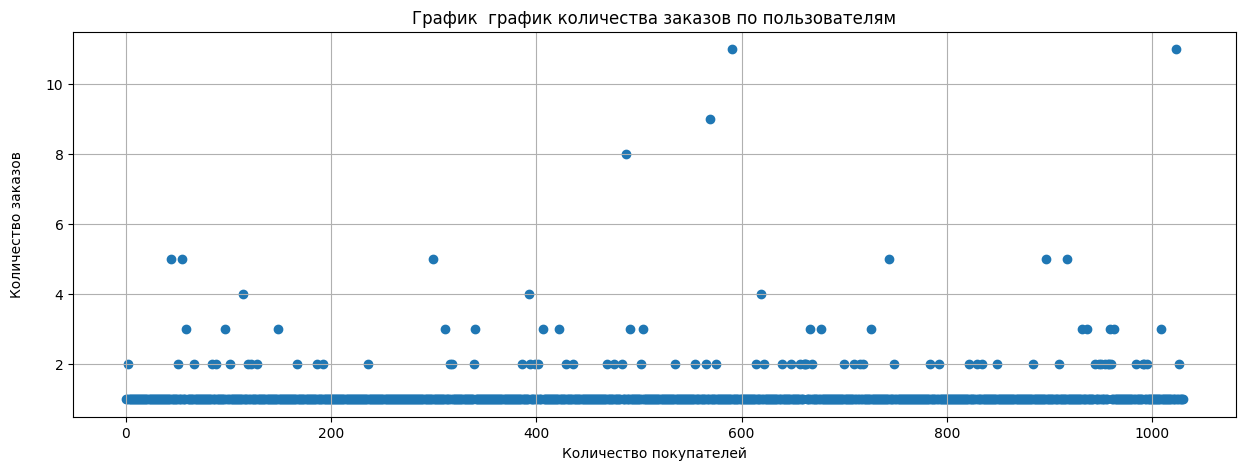

In [79]:
x_values1=pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.title('График  график количества заказов по пользователям')
plt.xlabel('Количество покупателей')
plt.ylabel('Количество заказов\n')
plt.grid()
plt.scatter(x_values1,ordersByUsers['orders']);

Как и оказалось, большинство клиентов совершают меньше 4-х заказов. Причем чаще всего совершают 1,2 и 3 заказа. 5 и более заказов - это аномальное значение для эксперимента

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [80]:
percentile_orders = np.percentile(ordersByUsers['orders'], [95, 99])
percentile_orders

array([2., 4.])

Только 5% пользователей сделали больше 2 заказов и только 1% пользователей сделали больше 4 заказов

Как границу для отсечения пользователей лучше использовать 95 процентиль, таким образом для исследования будут исключены пользователи, которые сделали больше 2 заказов

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

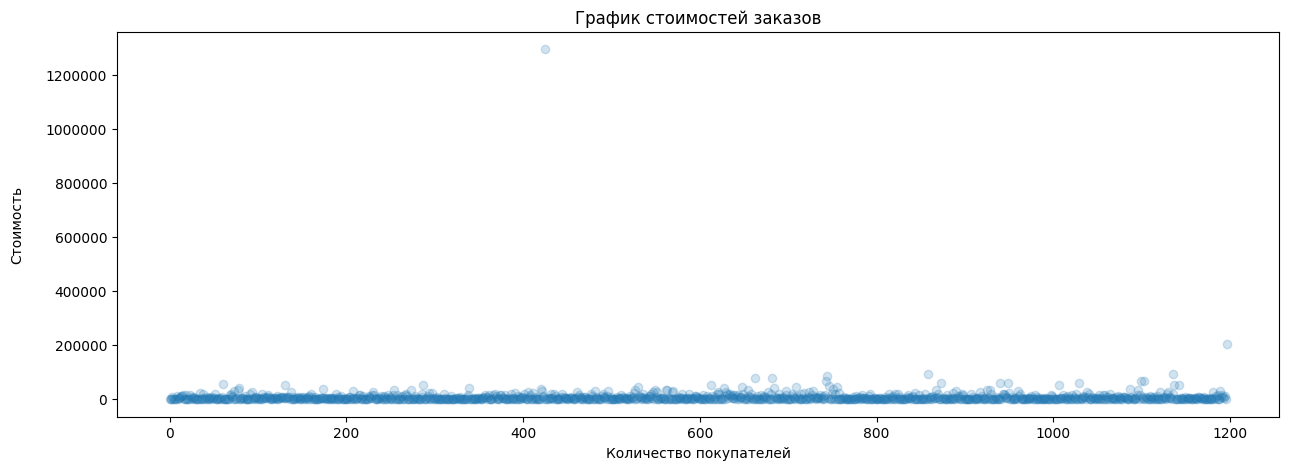

In [84]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.xlabel('Количество покупателей')
plt.ylabel('Стоимость\n')
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(x_values,orders['revenue'], alpha = 0.2);

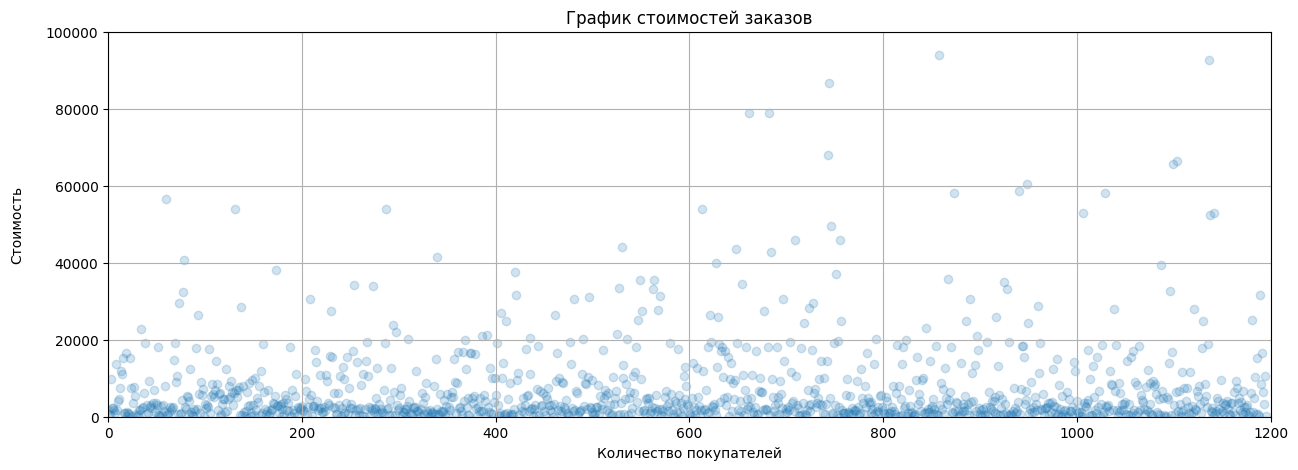

In [85]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.ticklabel_format(axis='y', style='plain')
plt.axis([0,1200,0,100000])
plt.title('График стоимостей заказов')
plt.xlabel('Количество покупателей')
plt.ylabel('Стоимость\n')
plt.grid()
plt.scatter(x_values,orders['revenue'], alpha = 0.2);

Большинство покупок по стоимости заказа составили около 20 000 - 30 000 рублей. Заказы выше 30 000 встречаются реже, а те, что превышают 40 000 выглядят как выбросы

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [86]:
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
percentile_revenue

array([28000. , 58233.2])

5% заказов были дороже 28000 и 1% заказов был дороже 58233.2

В качестве границ для устранения аномалий будем принимать 99-й перцентить, то есть будут убраны пользователи, совершившие заказы дороже 58233.2

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: Различий в среднем количестве заказов на посетителя между группами нет\
Альтернативная гипотеза: Различия в среднем количестве заказов на посетителя между группами есть

In [89]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Значение P-value: {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Изменение различий в среднем количестве заказов на посетителя между группами в долях: {0:.3f}'.format(sampleB.mean()/sampleA.mean() - 1))

Значение P-value: 0.01679
Изменение различий в среднем количестве заказов на посетителя между группами в долях: 0.138


Так как значение P-value меньше 0.05, то нулевую гипотезу нужно опревергнуть\
Можно сделать вывод, что различия в среднем количестве заказов между группами есть. Группа В лучше группы А в среднем на 13.8%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

Нулевая гипотеза: Cтатистических различий между средними чеками групп нет\
Альтернативная гипотеза: Статистическое различие между средними чеками групп есть

In [90]:
print('Значение P-value для "сырых" данных:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Преимущество группы В над группой А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Значение P-value для "сырых" данных: 0.729
Преимущество группы В над группой А: 0.259


Вывод: значение P-value больше 0.05, поэтому мы не можем отвегрнуть нулевую гипотезу, то есть различий между средними чеками изучаемых групп нет.
Рассчитанное преимущество группы В над группой А в данном случае можно признать случайным и статистически не значимым

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [92]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_orders[0]]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_orders[0]]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue[0]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74


Количество пользователей, которые можно назвать аномальными равно 74

In [95]:
round(abnormalUsers.shape[0]/orders['visitor_id'].count()*100,2)

6.18

Количество аномальных пользователей составило всего лишь 6,18% от общего числа, поэтому их можно убрать из общей выборки

### Повторное проведение тестов

In [97]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('Значение P-value для "очищенных" данных:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Изменение различий в среднем количестве заказов на посетителя между группами в долях:''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Значение P-value для "очищенных" данных: 0.013
Изменение различий в среднем количестве заказов на посетителя между группами в долях:0.173


Проведя тест уже с данными без аномальных пользователей можно сказать, что значение P-value снизилось и составило 0,013 (0,0167 значение для старых данных). Нулевую гипотезу нужно отвергнуть, так как полученное значение P-value меньше 0,05. Это говорит о том, что статистическое различие между средним количеством заказов по группам есть.
Группа В на 17.3% лучше группы А

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза: Различий в среднем чеке заказа между группами нет \
Альтернативная гипотеза: Различие в среднем чеке заказа между группами есть

In [99]:
print('Значение P-value для "очищенных" данных:'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Преимущество группы В над группой А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение P-value для "очищенных" данных:0.738
Преимущество группы В над группой А: -0.020


То, что мы избавились от аномальных пользователей значение P-value изменилось незначительно - выросло до 0.738, хотя прежде было 0.729. Поэтому аномальные пользователи не повлияли на результаты данного теста. Статистически значимых различий в среднем чеке между группами нет.
Но исключение выборки от аномальных пользователей позволило убрать разницу между большим преимуществом группы В над группной А. При "сырых данных" группа В была на 25% лучше группы А. Сейчас же ситуация изменилась и группа А сталуа лучше группы В на 2%. Такое критичное влияние произвели те пользователи, которые сделали аномально дорогие покупки!

### Примите решение по результатам теста и объясните его. Варианты решений:

1) Остановить тест, зафиксировать победу одной из групп.\
2) Остановить тест, зафиксировать отсутствие различий между группами.\
3) Продолжить тест.

Тест проводился в течение месяца, причем гипотеза о том, что различия по количеству заказов по группам исходя как из "сырых", так и из "очищенных" данных присутствует - в группе В было больше заказов, но это может быть связано с тем, что изначально в группе А было 503 участников, а в группе B было 586 участников. А вот гипотеза о том, что средние чеки среды участников из группы А и В оказались равными - принимается, поскольку значение p-value превышает уровень значимости. Поэтому с вероятностью 95% различий между средними чеками двух групп действительно нет.\
Также важно отметить, что по "очищенным" данным оказалось, что группа А показала лучшие результаты по среднему чеку, хотя по "грязным" данным лучшие результаты показала группа В.\
Таким образом промежуток времени в 30 дней и получение подобных результатов на основе которых нельзя сказать, что какая-то группа определенно лучше по показателям, чем другая, приводит к выводу, что данный тест нужно преостановить и зафиксировать отсутствие различий между группами. Потому что несмотря на то, что преимущество группы В по "сырым" данным и преимущество группы А по "чистым" данным не даёт точно понять, действительно ли какая-то из двух групп лучше. 

### Общий вывод:

В данном исследовании удалось приоритезировать гипотезы с помощью показателей ICE и RICE,а также провести А/В тестирование.\
Бизнесу необходимо в первую очередь обратить внимание на  добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и добление блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, поскольку данные гипотезы имеют большой приоритет как по ICE, так и по RICE.\
Если же мы говорим о проведение А/В теста, то в данном случае не удалось выявить значимых различий между группами, которые могли бы дать важную информацию для ведения бизнеса и дальнейшей его стратегии. 